In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации
from matplotlib.pyplot import xlabel, xticks

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [2]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
print(data.shape)

(1338, 7)


In [4]:
display(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
display(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Исследование зависимостей в данных

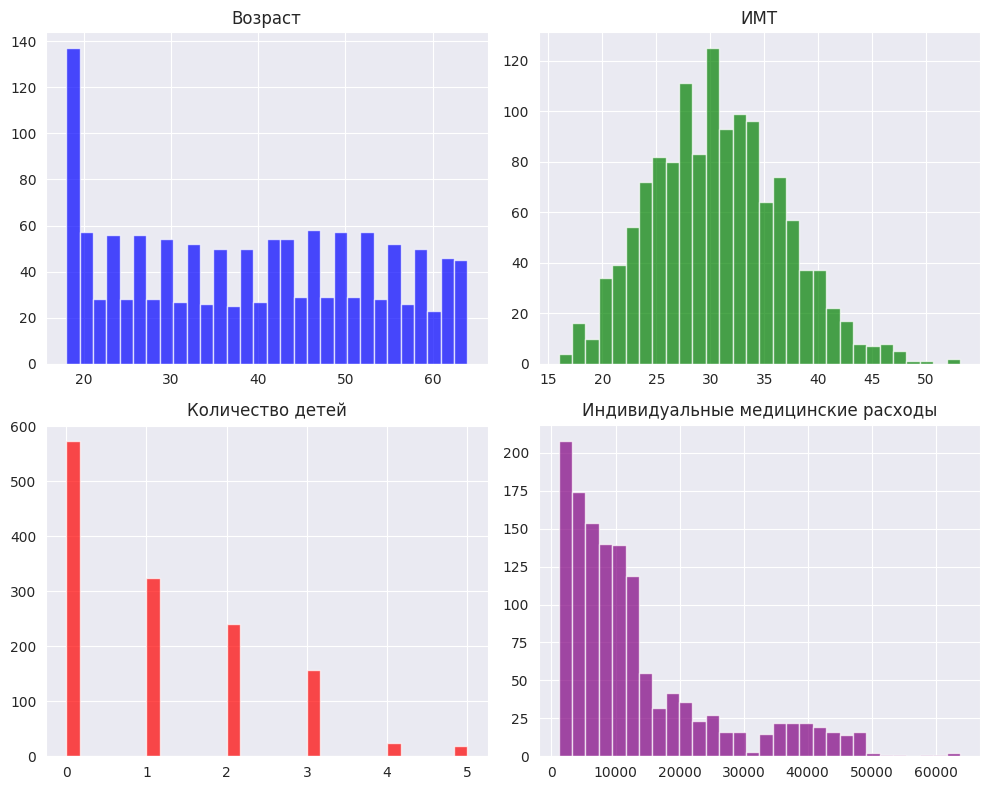

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

axes[0, 0].hist(data['age'], bins=30, color='blue', alpha=0.7)
axes[0, 0].set_title('Возраст')

axes[0, 1].hist(data['bmi'], bins=30, color='green', alpha=0.7)
axes[0, 1].set_title('ИМТ')

axes[1, 0].hist(data['children'], bins=30, color='red', alpha=0.7)
axes[1, 0].set_title('Количество детей')

axes[1, 1].hist(data['charges'], bins=30, color='purple', alpha=0.7)
axes[1, 1].set_title('Индивидуальные медицинские расходы')

plt.tight_layout()
plt.show()

In [7]:
data['smoker'] = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)

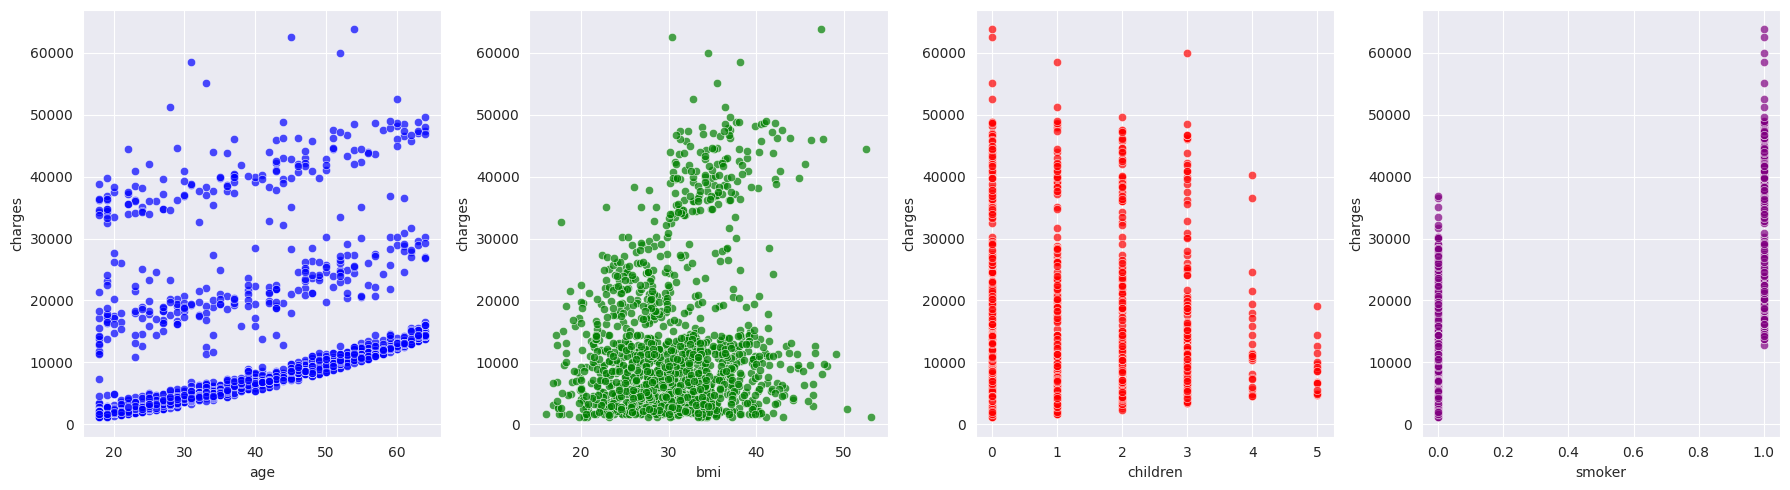

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

sns.scatterplot(data=data, x='age', y='charges', alpha=0.7, ax=axes[0], color='blue')

sns.scatterplot(data=data, x='bmi', y='charges', alpha=0.7, ax=axes[1], color='green')

sns.scatterplot(data=data, x='children', y='charges', alpha=0.7, ax=axes[2], color='red')

sns.scatterplot(data=data, x='smoker', y='charges', alpha=0.7, ax=axes[3], color='purple')

plt.tight_layout()
plt.show()

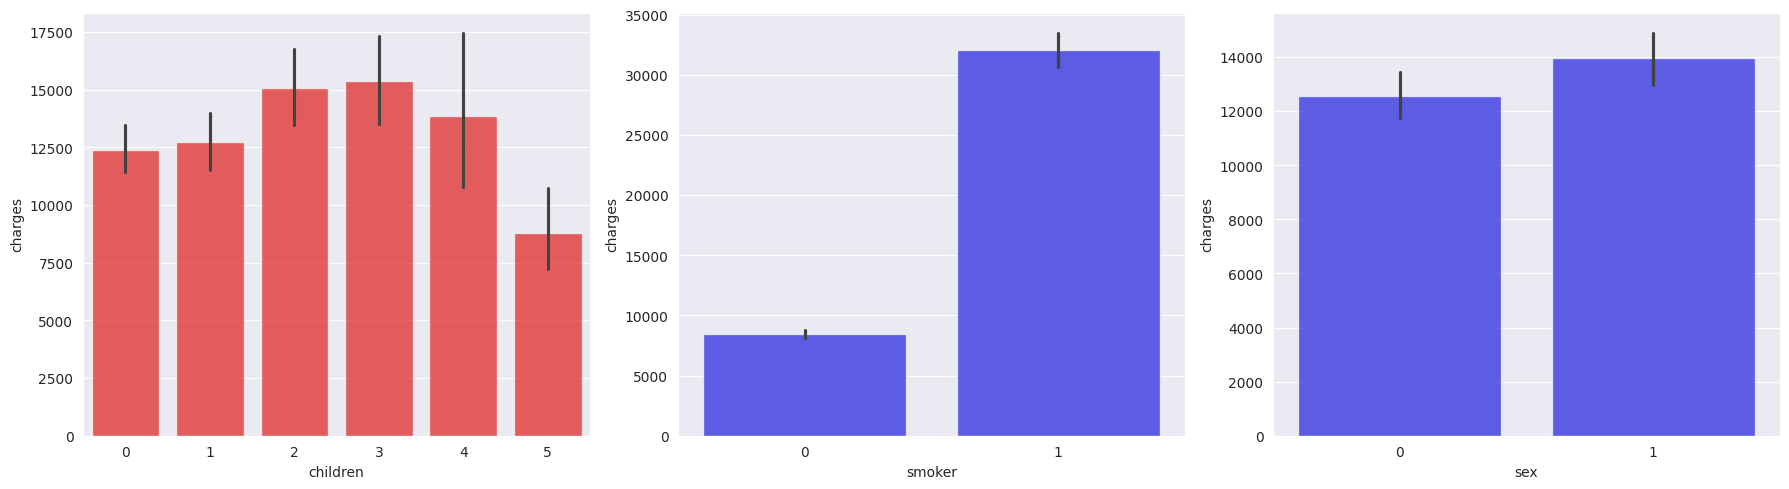

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(data=data, x='children', y='charges', alpha=0.7, ax=axes[0], color='red')

sns.barplot(data=data, x='smoker', y='charges', alpha=0.7, ax=axes[1], color='blue')

sns.barplot(data=data, x='sex', y='charges', alpha=0.7, ax=axes[2], color='blue')

plt.tight_layout()
plt.show()

Модель линейной регрессии не умеет работать с категориальными признаками, поэтому категории необходимо перекодировать. Smoker и sex перекодировала ранее, для построения графиков. Для перекодирования region использую OneHot-кодирование.

In [10]:
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data, dtype=int)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int64  
 7   region_northwest  1338 non-null   int64  
 8   region_southeast  1338 non-null   int64  
 9   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


### Моделирование

In [12]:
#Выделение факторов и целевого признака в отдельные таблицы
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']

### Разделение набора данных на тренировочную и тестовую выборки в соотношении 80/20.

In [13]:
# Разделение набора данных на тренировочную и тестовую выборки в соотношении 80/20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_test

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
764,45,0,25.175,2,0,1,0,0,0
887,36,0,30.020,0,0,0,1,0,0
890,64,0,26.885,0,1,0,1,0,0
1293,46,1,25.745,3,0,0,1,0,0
259,19,1,31.920,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
109,63,1,35.090,0,1,0,0,1,0
575,58,0,27.170,0,0,0,1,0,0
535,38,1,28.025,1,0,1,0,0,0
543,54,0,47.410,0,1,0,0,1,0


In [15]:
#Создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()
#Обучаем модель по МНК
lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
round(lr_model.intercept_, 2)

np.float64(-12390.8)

In [17]:
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

### Расчет метрик

In [18]:
# R2 тренировочная

round(metrics.r2_score(y_train, y_train_pred), 3)

0.742

In [19]:
# MAE тренировочная

round(metrics.mean_absolute_error(y_train, y_train_pred), 0)

4208.0

In [20]:
# MAPE тренировочная

round(metrics.mean_absolute_percentage_error(y_train, y_train_pred)*100, 0)

42.0

In [21]:
# R2 тестовая

round(metrics.r2_score(y_test, y_test_pred), 3)

0.784

In [22]:
# MAE тестовая

round(metrics.mean_absolute_error(y_test, y_test_pred), 0)

4181.0

In [23]:
# MAPE тестовая

round(metrics.mean_absolute_percentage_error(y_test, y_test_pred)*100, 0)

47.0

### Визуализация ошибок модели линейной регрессии на тренировочной и тестовой выборках

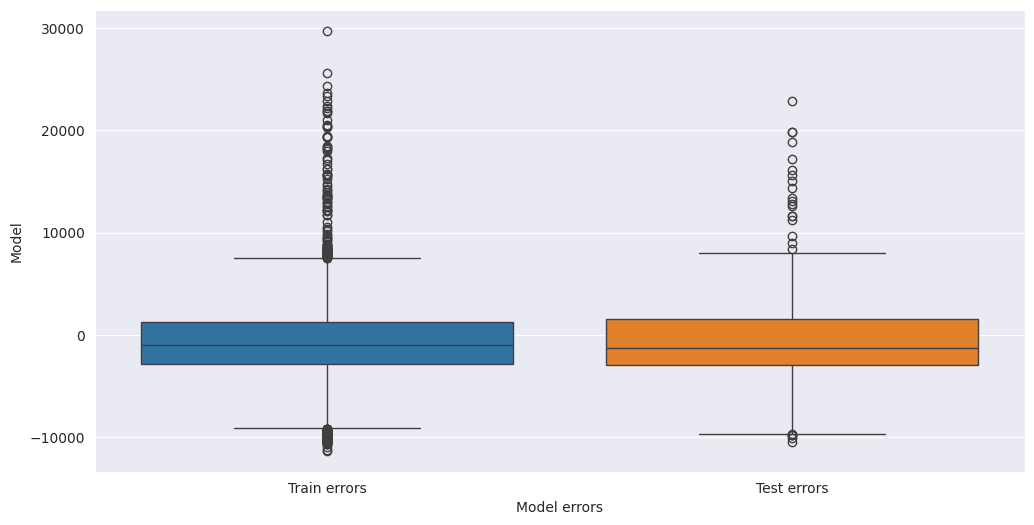

In [24]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) 

#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - y_train_pred
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_pred
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

### Нормализация тренировочной и тестовой выборки с помощью min-max-нормализации (MinMaxScaler) 

In [25]:
#Создаем объект для min-max нормализации
scaler = preprocessing.MinMaxScaler()
#Вычисляем параметры для нормализации - min и max для каждого столбца
scaler.fit(X_train)
#Производим преобразование для тренировочной выборки
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Создаем объект для генерации полиномиальных признаков степени 2
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
#Вычисляем параметры генерации - результирующее количество признак
poly.fit(X_train_scaled)
#Производим преобразование для каждой из выборок
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

In [26]:
X_train_scaled_poly.shape

(1070, 54)

### Обучение модели линейной регрессии на полиномиальных признаках

In [27]:
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)

y_train_pred_poly = lr_poly.predict(X_train_scaled_poly)
y_test_pred_poly = lr_poly.predict(X_test_scaled_poly)

round(metrics.r2_score(y_test, y_test_pred_poly), 3)

0.867

In [28]:
print(lr_poly.coef_)

[ 2849.35067435  -417.24034999  5935.92169643  4636.08544526
  1139.1491985    351.86496094  -366.48563336   227.08922666
  -212.46855424  8399.63608632   812.46558472   995.68651894
 -1666.91118191   172.50303109  -848.02252419   280.84325571
  1455.92298005  1960.60696278  -417.24034999   647.47475622
 -1238.19812114   257.33745404  -966.67881613   311.8232212
   544.21466602  -306.59942109 -9711.00034091  1559.87212018
 54839.212545    3782.01457236  2765.86075737  -794.72610916
   182.77247586 -2090.61756751 -2233.48411893  2438.06291171
  2463.6574199    410.25306251  -675.88794885  1139.1491985
   318.56157022  -298.80831333  -589.98196067  1709.37790228
   351.86496094     0.             0.             0.
  -366.48563336     0.             0.           227.08922666
     0.          -212.46855424]


### Линейная регрессия с L1-регуляризацией (Lasso) на полиномиальных признаках

In [29]:
#Создаём объект класса линейной регрессии с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso()
#Обучаем модель
lasso_lr_poly.fit(X_train_scaled_poly, y_train)

y_train_pred_lasso = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_pred_lasso = lasso_lr_poly.predict(X_test_scaled_poly)


/home/dasha/.local/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.292e+09, tolerance: 1.544e+07
  model = cd_fast.enet_coordinate_descent(


In [30]:
round(metrics.r2_score(y_test, y_test_pred_lasso), 3)

0.867

In [31]:
round(metrics.mean_absolute_percentage_error(y_test, y_test_pred_lasso)*100, 0)

30.0

In [38]:
metrics.mean_absolute_error(y_test, y_test_pred_lasso)

2717.8195375704317

### Линейная регрессия с L2-регуляризацией на полиномиальных признаках

In [33]:
#Инициализируем объект класса линейная регрессия с L2-регуляризацией 
ridge_lr = linear_model.Ridge()

ridge_lr.fit(X_train_scaled_poly, y_train)

#Делаем предсказание для каждой из выборок
y_train_pred_ridge = ridge_lr.predict(X_train_scaled_poly)
y_test_pred_ridge = ridge_lr.predict(X_test_scaled_poly)

In [34]:
# R2 тестовая

round(metrics.r2_score(y_test, y_test_pred_ridge), 3)

0.863

In [35]:
# MAE тестовая

round(metrics.mean_absolute_error(y_test, y_test_pred_ridge), 0)

2861.0

In [36]:
# MAPE тестовая

round(metrics.mean_absolute_percentage_error(y_test, y_test_pred_ridge)*100, 0)

31.0